# **Decision Tree Classifier**

Here we will generate a decision tree and apply post pruning and pre pruning on it. 

## 1. Post Pruning
For Post Pruning, we will take a small dataset called IRIS within scikit-learn.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
from sklearn.datasets import load_iris
iris = load_iris()

In [68]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [69]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [70]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In this dataset we have three classes and there are equal number of examples of each.

In [71]:
iris.DESCR.split('\n')

['.. _iris_dataset:',
 '',
 'Iris plants dataset',
 '--------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 ':Number of Instances: 150 (50 in each of three classes)',
 ':Number of Attributes: 4 numeric, predictive attributes and the class',
 ':Attribute Information:',
 '    - sepal length in cm',
 '    - sepal width in cm',
 '    - petal length in cm',
 '    - petal width in cm',
 '    - class:',
 '            - Iris-Setosa',
 '            - Iris-Versicolour',
 '            - Iris-Virginica',
 '',
 ':Summary Statistics:',
 '',
 '============== ==== ==== ======= ===== ====================',
 '                Min  Max   Mean    SD   Class Correlation',
 '============== ==== ==== ======= ===== ====================',
 'sepal length:   4.3  7.9   5.84   0.83    0.7826',
 'sepal width:    2.0  4.4   3.05   0.43   -0.4194',
 'petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)',
 'petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)',
 '============== ==== ==== =======

The three classes are:
- Setosa

- Versicolour

- Virginica


In [72]:
# independent and dependent features
X = df.iloc[:, :-1]
y = df[['target']]

In [73]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [74]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [75]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [77]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4
31,5.4,3.4,1.5,0.4
64,5.6,2.9,3.6,1.3
141,6.9,3.1,5.1,2.3
68,6.2,2.2,4.5,1.5
82,5.8,2.7,3.9,1.2


In [78]:
y_test

,target
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [79]:
y_train

,target
81,1
133,2
137,2
75,1
109,2
...,...
71,1
106,2
14,0
92,1


In [80]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()

Right now the model will take the default parameters as mentioned in the docs of sklearn. We will change hyperparameters in Pre Pruning.

In [81]:
treemodel.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0

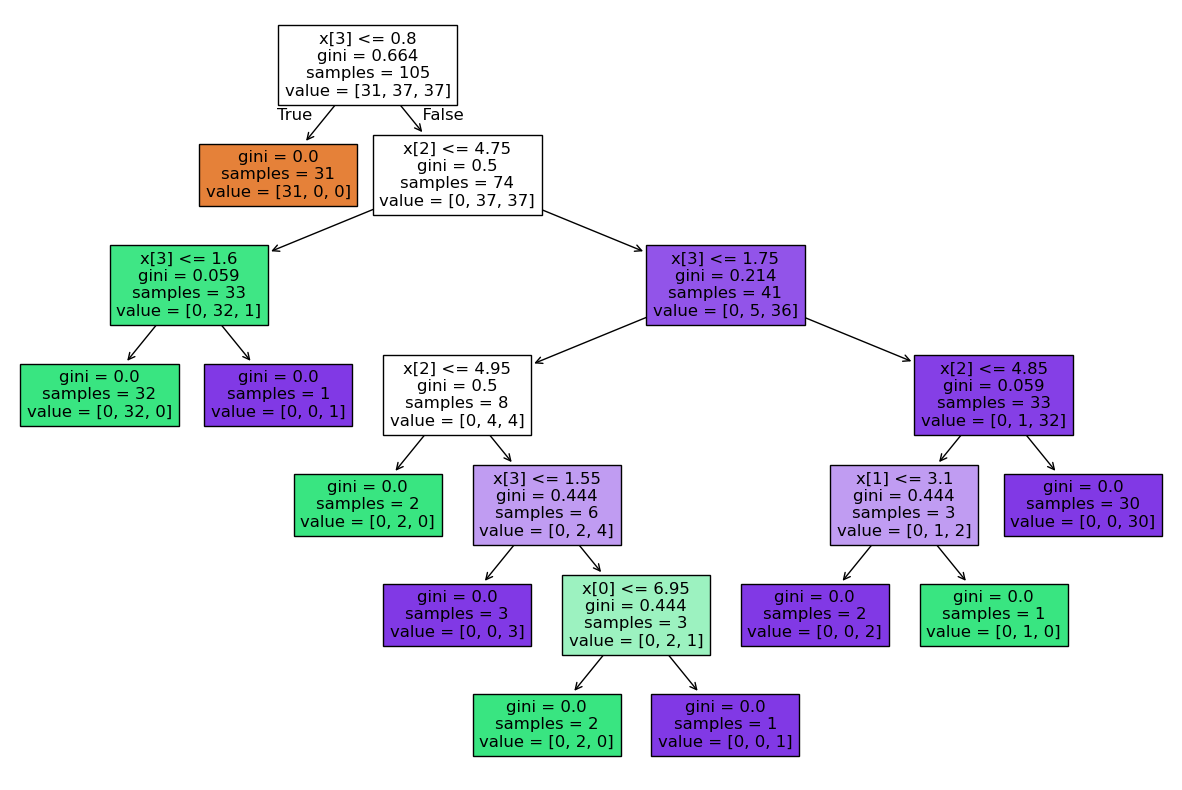

In [82]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True)

Observing the topmost node (depth = 0):
- gini impurity will be highest only for this node, beyond this the value will be between `0 to 0.5`
- it shows the top number of samples is 105, which is correct as we set `0.3 * 150 = 45` samples as testing set and the remaining `0.7 * 150 = 105` as training set.
- the values = `[31, 37, 37]` represent count of each label `0, 1, and 2`
- the node has been split along feature x[3] = `petal width (cm)`

In [83]:
y_pred = treemodel.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [84]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, y_pred)
score

1.0

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



The model is giving 1.0 score which is a clear sign of overfitting. Let us try performing post pruning on the same data.

In [86]:
new_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
new_tree_model.fit(X_train, y_train)
# we have modified the hyperparameters a little after seeing the results of the previously generated tree.

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]')]

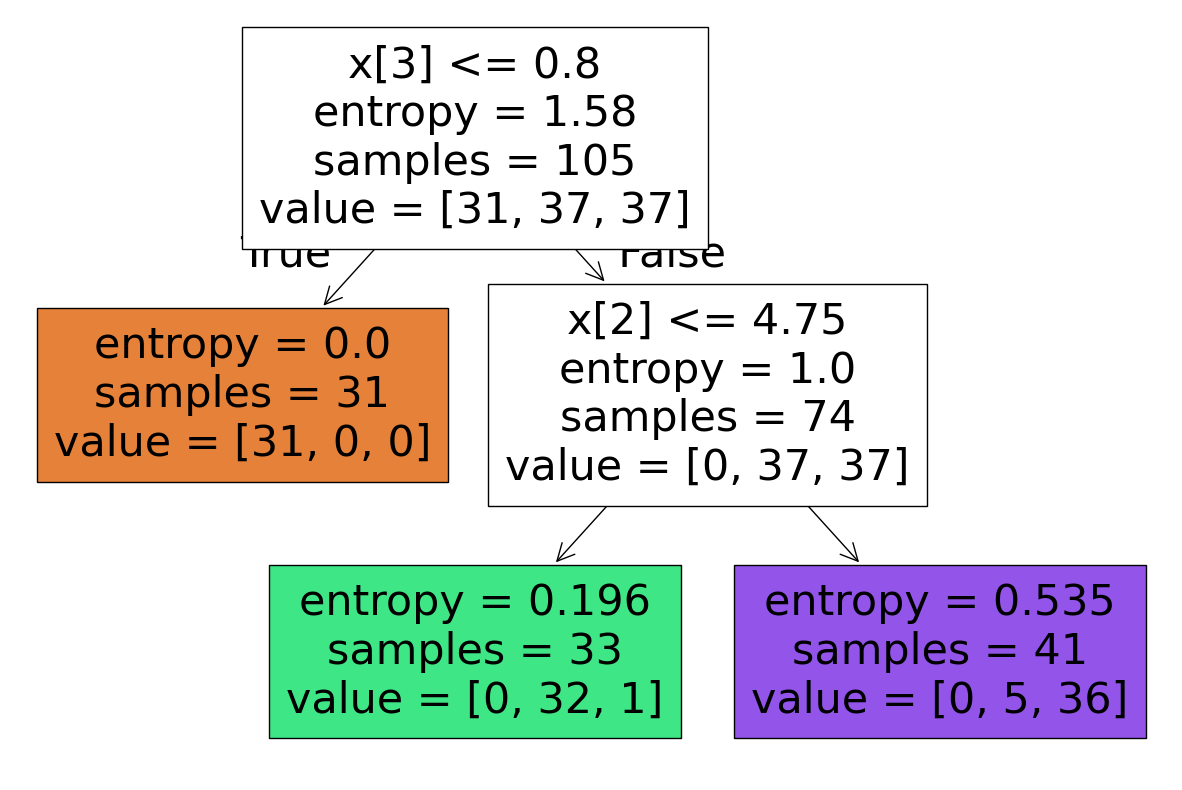

In [87]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(new_tree_model, filled=True)

In [88]:
new_y_predict = new_tree_model.predict(X_test)
new_y_predict

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [89]:
from sklearn.metrics import accuracy_score, classification_report
score = accuracy_score(y_test, new_y_predict)
score

0.9777777777777777

In [90]:
print(classification_report(y_test, new_y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



This model obtained after post pruning is a little more generalized.

## 2. Pre Pruning

In pre pruning we don't get to see the decision tree before-hand. Rather we change hyperparameters such that the growth of the tree is constrained. Let's give it a try.

In [91]:
# listing hyperparameters we will tune for prepruning
parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1,2,3,4,5],
    'max_features': ['auto', 'sqrt', 'log2'],
    # 'ccp_alpha' : [1,2,3,4,5,6,7]
}
# more parameters can be added from sklearn docs

We will try all possible combinations of these parameters to see which combination works the best for our model in delivering a high accuracy generalized model.

In [92]:
from sklearn.model_selection import GridSearchCV
# for hyperparameter tuning

In [93]:
dtree = DecisionTreeClassifier()
cv = GridSearchCV(dtree, parameters, cv=5, scoring = 'accuracy')
# cv = cross validation
# cv = 5 means 5 fold cross validation

In [94]:
cv.fit(X_train, y_train)

c:\Users\ujjwa\miniconda3\envs\manthan\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ujjwa\miniconda3\envs\manthan\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ujjwa\miniconda3\envs\manthan\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\ujjwa\miniconda3\envs\manthan\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_const

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [95]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [100]:
y_test

,target
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [101]:
y_pred = cv.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, classification_report

In [103]:
score = accuracy_score(y_test, y_pred)

In [104]:
score

0.9777777777777777

In [106]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

